## 📦 Import Libraries and Load Dataset

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Load the dataset
file_path = "online_retail_II.xlsx"
df = pd.read_excel(file_path, sheet_name='Year 2010-2011')

# Show first few rows
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 🧹 Data Cleaning

In [8]:
# Check for missing values
df.isnull().sum()


Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [9]:
# Drop rows with missing CustomerID or Description
df = df.dropna(subset=['Customer ID', 'Description'])


In [10]:
# Remove duplicates
df = df.drop_duplicates()


In [11]:
# Remove canceled orders (InvoiceNo starts with 'C')
df = df[~df['Invoice'].astype(str).str.startswith('C')]


In [12]:
# Remove negative or zero quantities and unit prices
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]


In [13]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


## 📊 General Overview

In [14]:
print("Unique products:", df['StockCode'].nunique())
print("Total transactions:", df['Invoice'].nunique())
print("Unique customers:", df['Customer ID'].nunique())
print("Countries:", df['Country'].nunique())


Unique products: 3665
Total transactions: 18532
Unique customers: 4338
Countries: 37


## 🛍️ Product Analysis

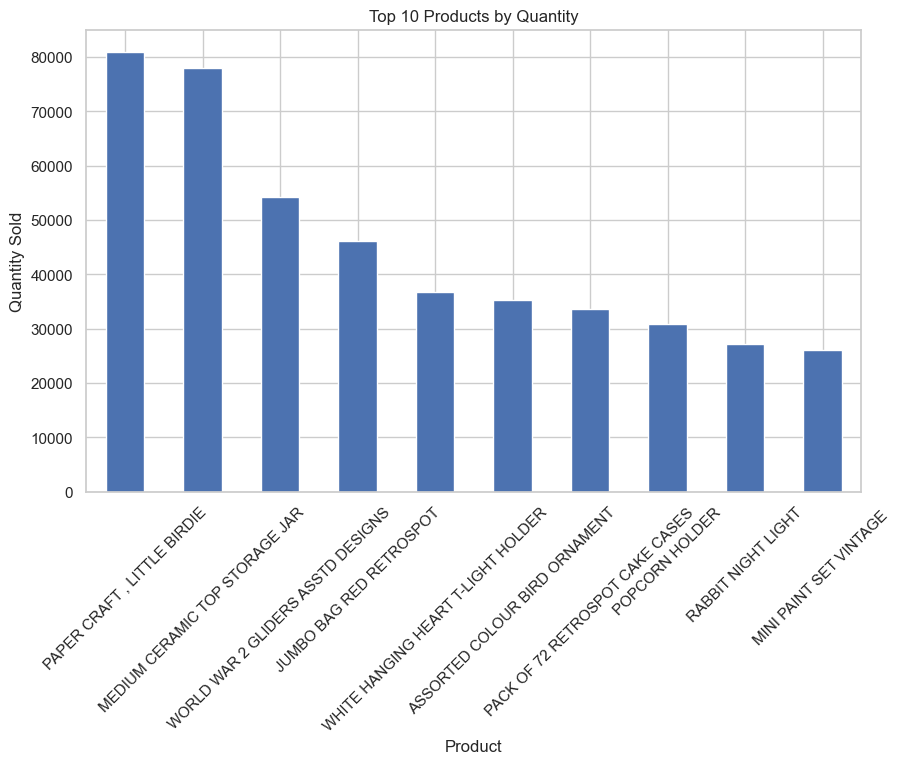

In [15]:
# Top 10 selling products by quantity
top_quantity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_quantity.plot(kind='bar', title='Top 10 Products by Quantity')
plt.xlabel("Product")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.show()


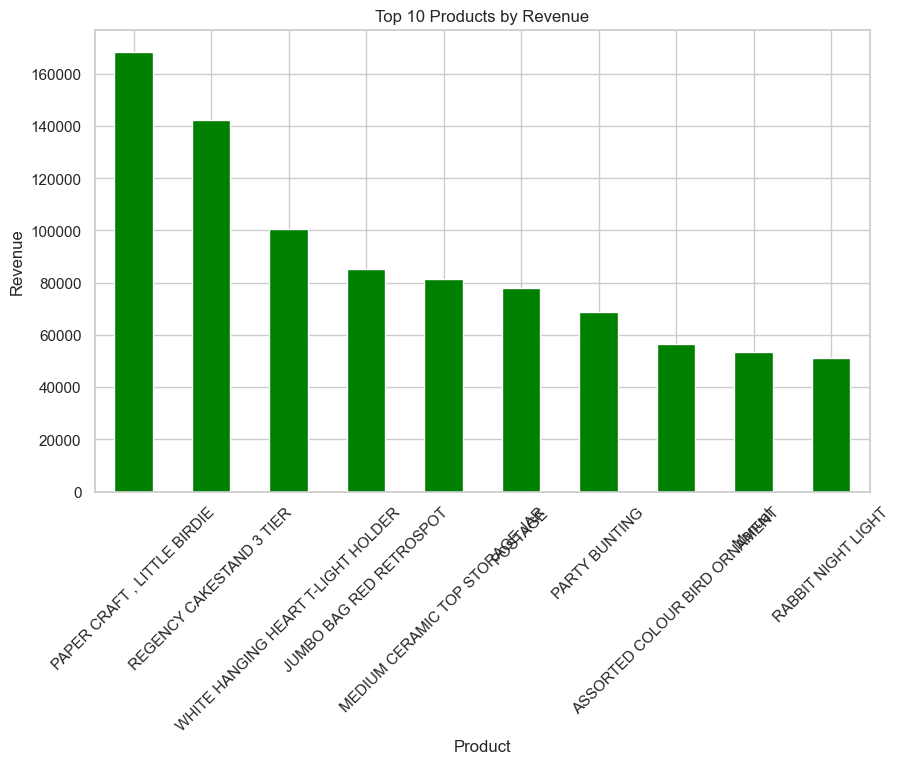

In [16]:
# Add revenue column
df['Revenue'] = df['Quantity'] * df['Price']

# Top 10 products by revenue
top_revenue = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)
top_revenue.plot(kind='bar', color='green', title='Top 10 Products by Revenue')
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Products with zero or negative prices (already removed earlier)
df[df['Price'] <= 0]


## 👤 Customer Analysis

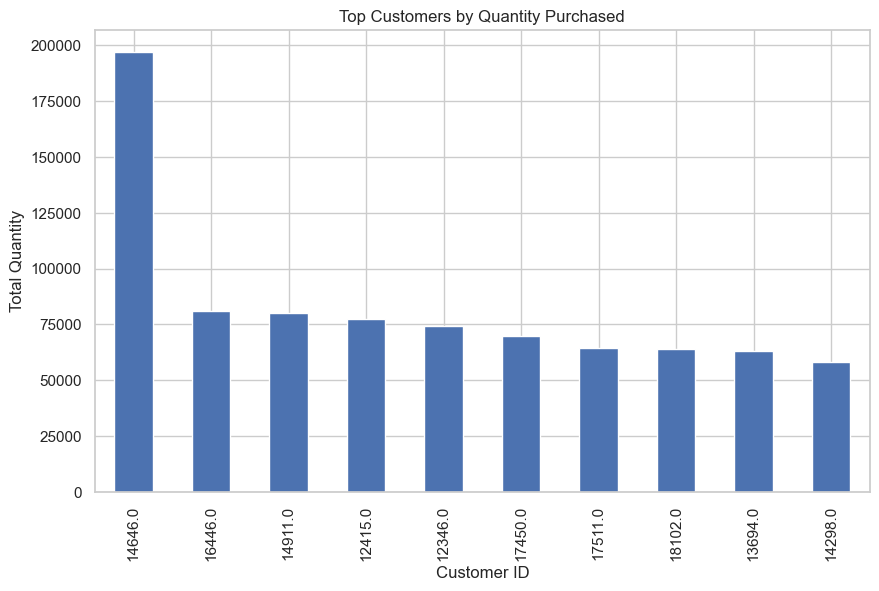

In [17]:
# Most purchases by customers
top_customers = df.groupby('Customer ID')['Quantity'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', title='Top Customers by Quantity Purchased')
plt.ylabel("Total Quantity")
plt.show()


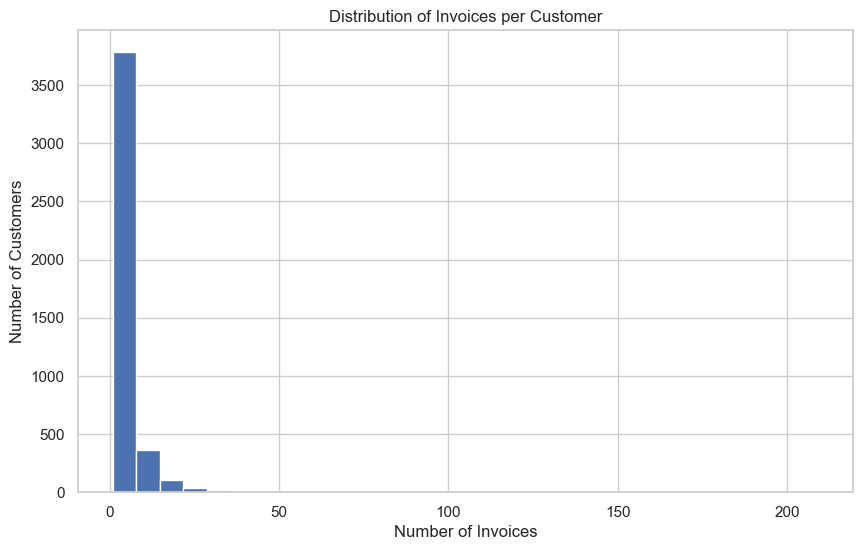

In [18]:
# Distribution of purchases per customer
df.groupby('Customer ID')['Invoice'].nunique().hist(bins=30)
plt.title("Distribution of Invoices per Customer")
plt.xlabel("Number of Invoices")
plt.ylabel("Number of Customers")
plt.show()


## 🕒 Time Series & Seasonal Trends

C:\Users\musav\AppData\Local\Temp\ipykernel_6796\3123438695.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('InvoiceDate').resample('M')['Revenue'].sum()


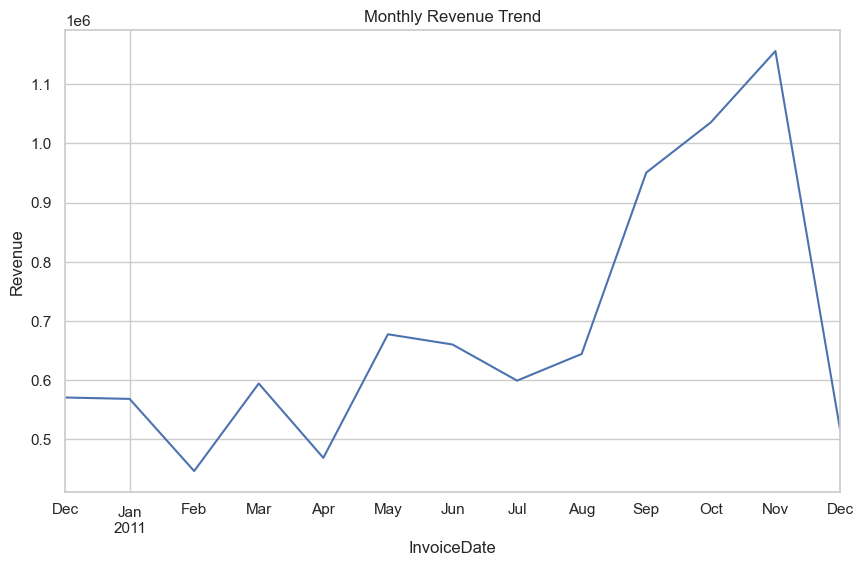

In [19]:
# Monthly Sales Trends
monthly_sales = df.set_index('InvoiceDate').resample('M')['Revenue'].sum()
monthly_sales.plot(title="Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.show()


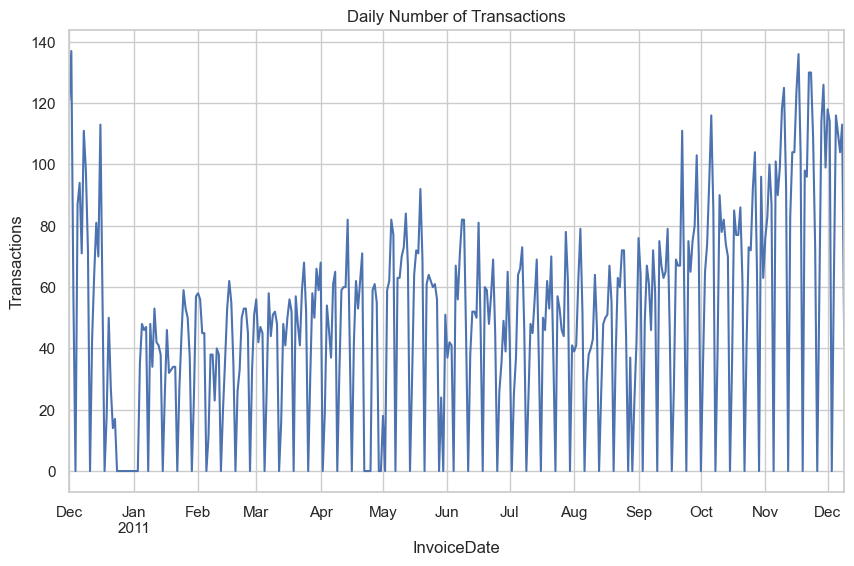

In [20]:
# Daily transaction patterns
daily_transactions = df.set_index('InvoiceDate').resample('D')['Invoice'].nunique()
daily_transactions.plot(title="Daily Number of Transactions")
plt.ylabel("Transactions")
plt.show()


## 🌍 Country Analysis

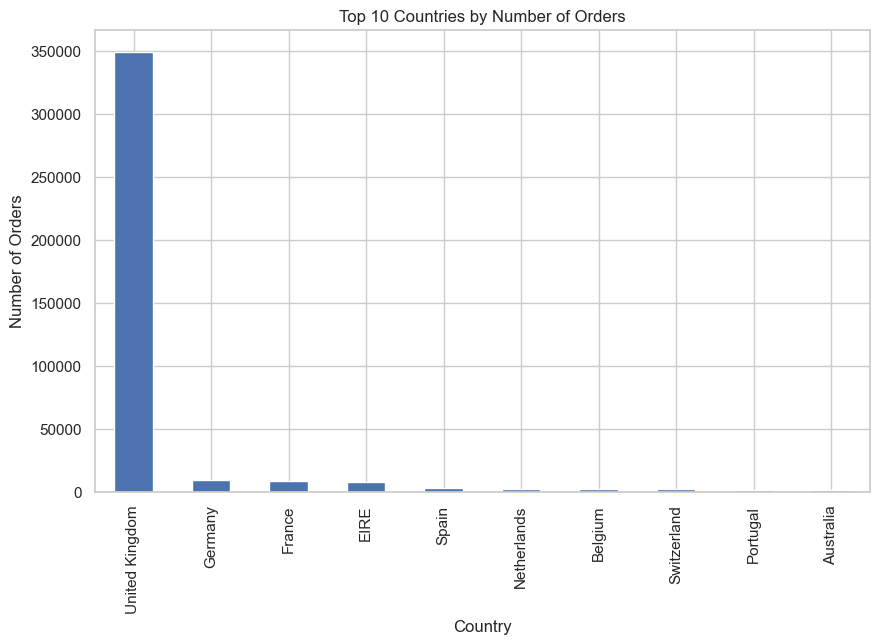

In [21]:
# Orders by country
orders_by_country = df['Country'].value_counts().head(10)
orders_by_country.plot(kind='bar', title='Top 10 Countries by Number of Orders')
plt.ylabel("Number of Orders")
plt.show()


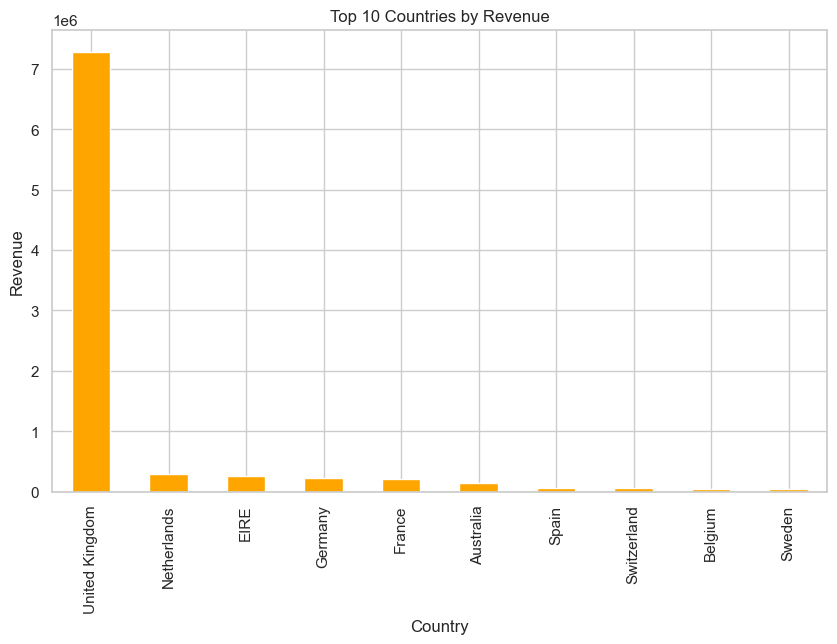

In [22]:
# Revenue by country
revenue_by_country = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)
revenue_by_country.plot(kind='bar', color='orange', title='Top 10 Countries by Revenue')
plt.ylabel("Revenue")
plt.show()


##  RFM Segmentation

In [23]:
# Reference date for recency
latest_date = df['InvoiceDate'].max()

# Compute RFM metrics
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'Invoice': 'nunique',
    'Revenue': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'Invoice': 'Frequency',
    'Revenue': 'Monetary'
})

rfm.head()


,Recency,Frequency,Monetary
Customer ID,,,
12346.0,325,1,77183.60
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40


In [24]:
df.to_csv("Online_Retail_Cleaned.csv", index=False)

In [26]:
rfm.to_csv("RFM Segmentation.csv", index=False)